# IBM Capstone Project

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

print('Libraries imported.')

Libraries imported.


if I want to buy a house, 
? what location 
? at what price
? what that include...how many bedroom or bathroom
? What is the best potencial hose style

#### 1st: Get the relationship between  each characteristic of the house with their price
#### 2nd: Draw some graph to show the relationship
####  ------ Seperate training/ testing dataset
#### ------ Find the best fit model for these data
#### 3rd: 
#### 4th: 
#### ------ Call Foursquare API get data, and relate it to the results
        Using K-mean/ DBdensity clustering alrgorithm separate category
        Find best K value for K-mean clustering then apply it to the model
#### 5th: Add marker on folium diagram for each different clustering house


### Get the city address from geocoder

In [2]:
address = 'Beijing'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of City Beijing are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of City Beijing are 39.906217, 116.3912757.


In [3]:
# create map of ShenZhen using latitude and longitude values
map_sz = folium.Map(location=[latitude, longitude], zoom_start=10)
map_sz

### Define foursquare credentials 

In [4]:
#CLIENT_ID = 'G442UEGZJY4YOVFZJ31EGA2ZDPJ22YVT331YEMC4R2U1DYJM' # your Foursquare ID
#CLIENT_SECRET = 'COI5CMEHNJAINOP1A52XD4BLBCREPM0EKRQDEUZHUWQCIHGG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

CLIENT_ID = 'HP3CT0HBSHZIQRRZDUAHG3XYKJ4KCI34M4TNMYOE3TQRDINA' # your Foursquare ID
CLIENT_SECRET = 'MQ2XOJ01SZYEVJQOW4A3BZRRWM0ILC30H4TBKYXDRG3GPZN3' # your Foursquare Secret

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HP3CT0HBSHZIQRRZDUAHG3XYKJ4KCI34M4TNMYOE3TQRDINA
CLIENT_SECRET:MQ2XOJ01SZYEVJQOW4A3BZRRWM0ILC30H4TBKYXDRG3GPZN3


### Get data from kaggle,


In [5]:
df_house = pd.read_csv("C:/Users/jinca/OneDrive/Desktop/new.csv", encoding='iso-8859-1', low_memory = False, index_col=False)

In [6]:
df_house.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,¸ß 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,¸ß 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,ÖÐ 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,µ× 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,ÖÐ 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


### Data pre-processing

In [7]:
print('Shape of the dataframe is: \n', df_house.shape)
print('Columns of the dataframe include: \n', df_house.columns)

Shape of the dataframe is: 
 (318851, 26)
Columns of the dataframe include: 
 Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype='object')


In [8]:
df = df_house[['Lat', 'Lng', 'totalPrice', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom',
              'buildingType', 'renovationCondition', 'buildingStructure', 'elevator', 'fiveYearsProperty',
              'subway']] 
df = df.sample(n = 5000)             #### Only randomly get 500 samples from the 330000+ data, for quick reviewing
df.head()

,Lat,Lng,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway
51247,39.955386,116.355475,402.0,40.00,1,1,1,1,4.0,3,2,0.0,1.0,0.0
89519,39.919830,116.609957,375.0,66.00,1,1,1,1,3.0,3,6,1.0,1.0,0.0
148610,39.983371,116.490734,220.0,65.03,2,1,1,1,4.0,1,6,0.0,1.0,1.0
301297,39.880102,116.376538,280.0,56.64,2,1,1,1,4.0,1,2,0.0,1.0,0.0
240241,39.839983,116.247907,193.8,62.83,1,1,1,1,3.0,4,6,1.0,1.0,0.0


In [9]:
print(df.shape)
df.reset_index(drop = True, inplace=True)
df.head()

(5000, 14)


,Lat,Lng,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway
0,39.955386,116.355475,402.0,40.00,1,1,1,1,4.0,3,2,0.0,1.0,0.0
1,39.919830,116.609957,375.0,66.00,1,1,1,1,3.0,3,6,1.0,1.0,0.0
2,39.983371,116.490734,220.0,65.03,2,1,1,1,4.0,1,6,0.0,1.0,1.0
3,39.880102,116.376538,280.0,56.64,2,1,1,1,4.0,1,2,0.0,1.0,0.0
4,39.839983,116.247907,193.8,62.83,1,1,1,1,3.0,4,6,1.0,1.0,0.0


In [10]:
df.isnull().values.sum()   ### Check how many NaN is in the data

34

In [11]:
df.dropna(axis = 0, inplace = True)    ### Clean data, drop the row with NaN value
df.shape

(4968, 14)

In [12]:
df.dtypes  ## Check type of each columns, change object to int for future analysis

Lat                    float64
Lng                    float64
totalPrice             float64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                  int64
bathRoom                object
buildingType           float64
renovationCondition      int64
buildingStructure        int64
elevator               float64
fiveYearsProperty      float64
subway                 float64
dtype: object

In [13]:
df[['livingRoom', 'drawingRoom', 'bathRoom']] = df[['livingRoom', 'drawingRoom', 'bathRoom']].astype(int)

In [14]:
#### data normalization for totalPrice, square
max_price = max(df['totalPrice'])
df['totalPrice']= df['totalPrice'] / max_price
max_square = max(df['square'])
df['square']= df['square'] / max_square

In [15]:
df_char = df[['square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'buildingType', 'renovationCondition', 'buildingStructure',
         'elevator', 'fiveYearsProperty', 'subway'] ] 

In [16]:
df_price= df[['totalPrice']]

In [17]:
df.head()

,Lat,Lng,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway
0,39.955386,116.355475,0.093925,0.090975,1,1,1,1,4.0,3,2,0.0,1.0,0.0
1,39.919830,116.609957,0.087617,0.150109,1,1,1,1,3.0,3,6,1.0,1.0,0.0
2,39.983371,116.490734,0.051402,0.147903,2,1,1,1,4.0,1,6,0.0,1.0,1.0
3,39.880102,116.376538,0.065421,0.128821,2,1,1,1,4.0,1,2,0.0,1.0,0.0
4,39.839983,116.247907,0.045280,0.142899,1,1,1,1,3.0,4,6,1.0,1.0,0.0


### Get some basic trend, relationship between each feature with the total Price of the house

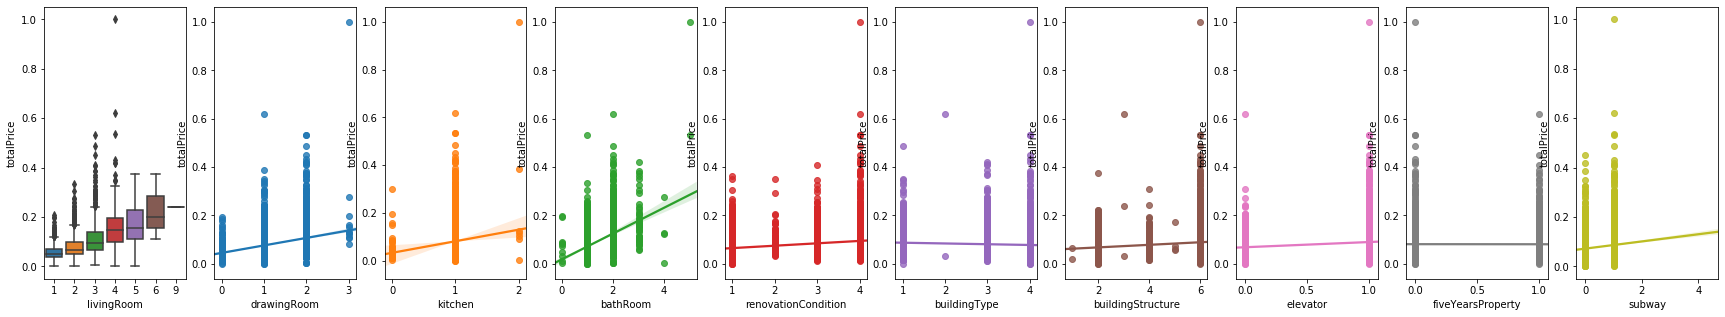

In [18]:
fig, axs = plt.subplots(ncols=10, figsize = (30,5))
sns.boxplot(x='livingRoom', y='totalPrice', data=df, ax=axs[0])
sns.regplot(x='drawingRoom', y='totalPrice', data=df, ax=axs[1])
sns.regplot(x='kitchen',y='totalPrice', data=df, ax=axs[2])
sns.regplot(x='bathRoom',y='totalPrice', data=df, ax=axs[3])
sns.regplot(x='renovationCondition',y='totalPrice', data=df, ax=axs[4])
sns.regplot(x='buildingType',y='totalPrice', data=df, ax=axs[5])
sns.regplot(x='buildingStructure',y='totalPrice', data=df, ax=axs[6])
sns.regplot(x='elevator',y='totalPrice', data=df, ax=axs[7])
sns.regplot(x='fiveYearsProperty',y='totalPrice', data=df, ax=axs[8])
sns.regplot(x='subway',y='totalPrice', data=df, ax=axs[9])

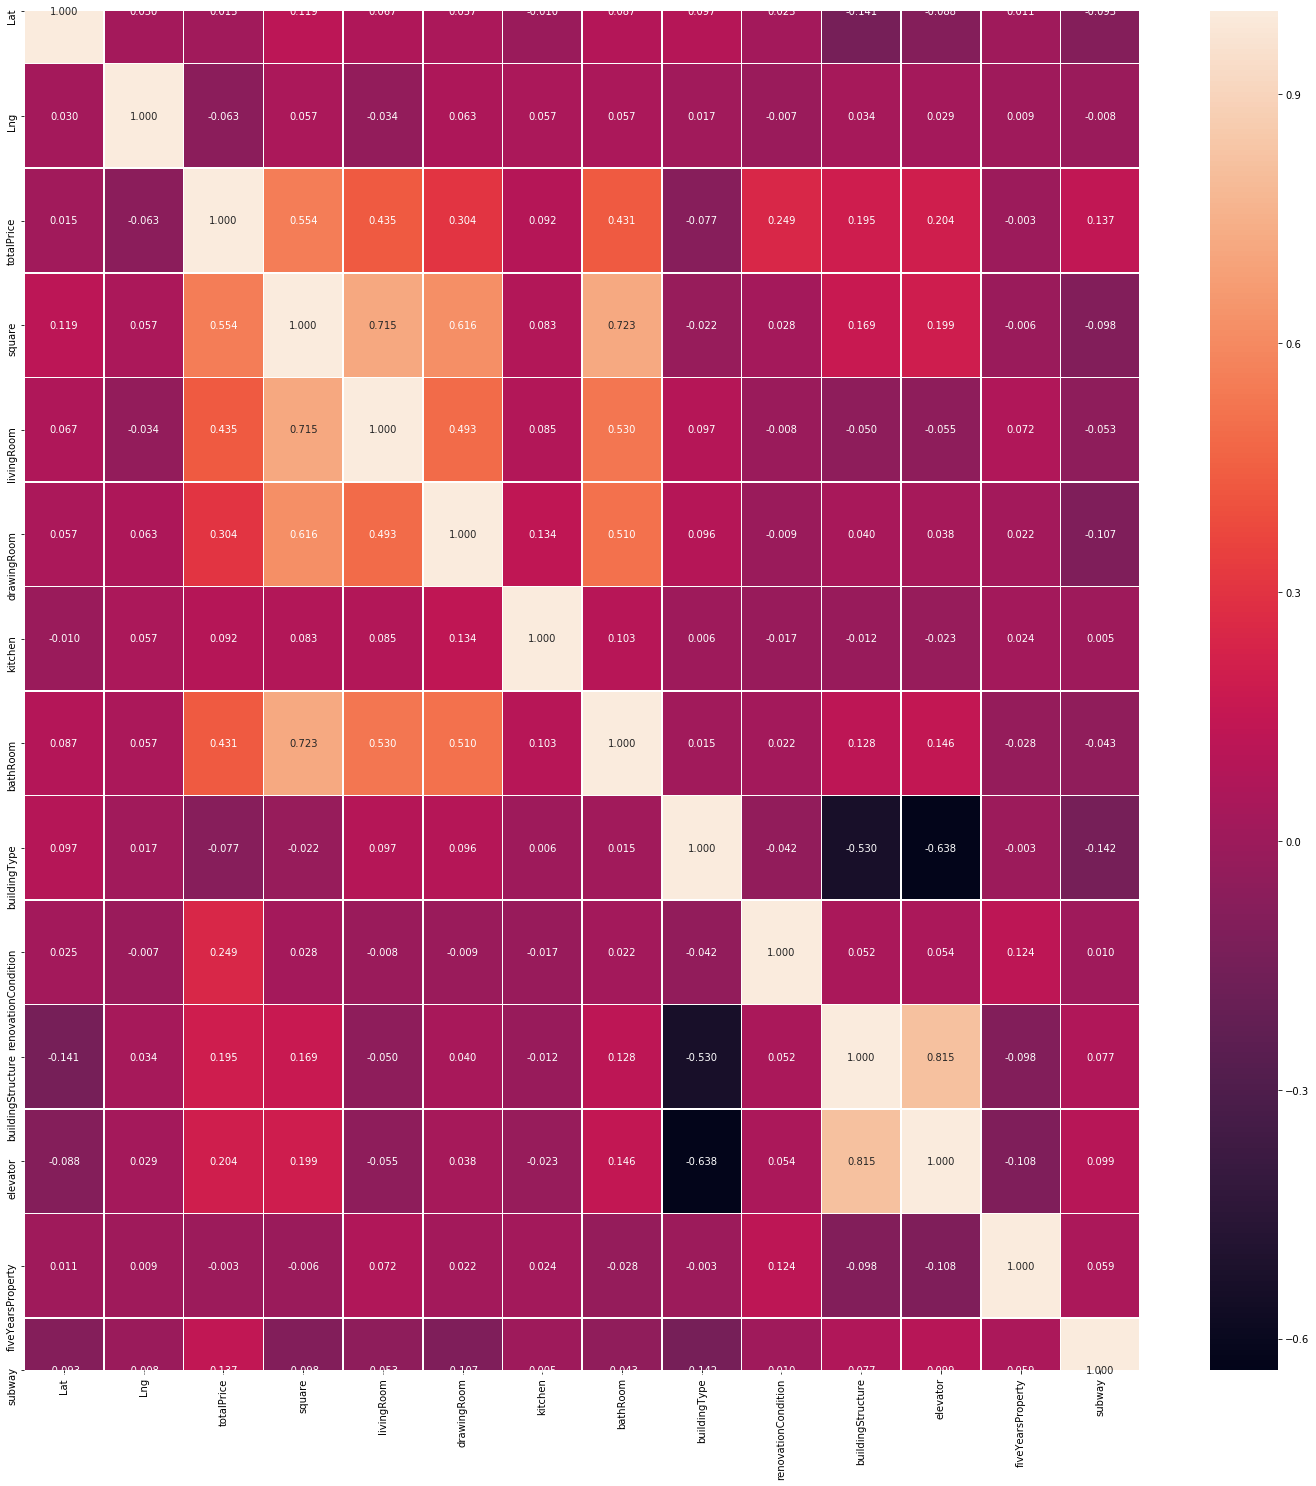

In [22]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df.corr(), annot = True, linewidth = .5, fmt = ".3f",ax = ax)
plt.show()

### Try SLR, simple linear regression model for the data

In [23]:
X = df_char
Y = df_price

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print("number of training samples:",x_train.shape[0])
print("number of test samples:", x_test.shape[0])

number of training samples: 3477
number of test samples: 1491


In [24]:
lm = LinearRegression()
lm.fit(X,Y)
print(lm.coef_)

[[ 0.28726788  0.00879223 -0.00498089  0.0272763   0.00576235  0.00092348
   0.00933828  0.00198237  0.00430012 -0.00395064  0.01885085]]


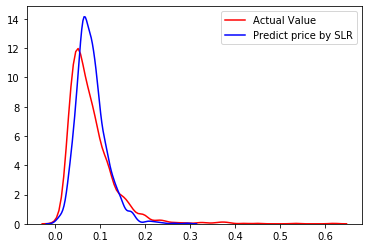

In [25]:
### predict by using x_test
yhat_lm = lm.predict(x_test)
ax1 = sns.distplot(y_test, hist= False, color='r', label = "Actual Value")
sns.distplot(yhat_lm, hist=False, color = "b", label ="Predict price by SLR", ax=ax1)

In [26]:
print('MSE for SLR is: ', mean_squared_error(y_test, yhat_lm))
print('R score for SLR is: ', lm.score(x_test, y_test))

MSE for SLR is:  0.0016599302688888149
R score for SLR is:  0.4265988630702905


### Try PolyRegression

In [27]:
Rsqu_test = [] ## create empty list
order =[1,2,3,4]    ## contains different polynomial orders
for n in order:
	pr = PolynomialFeatures(degree = n)
	x_train_pr =pr.fit_transform(x_train)
	x_test_pr = pr.fit_transform(x_test)
	lm.fit(x_train_pr, y_train)
	Rsqu_test.append(lm.score(x_test_pr, y_test))
print('R square score for different polynomial orders are: ',Rsqu_test)
print('The best polynomial score is: 2')

R square score for different polynomial orders are:  [0.4239547021914979, 0.47217521788327826, -24.06294440883649, -662.995604044635]
The best polynomial score is: 2


### Try ridge model

MSE for RidgeModel is:  0.0016676800561419493
R score for RidgeModel is:  0.42392180072303576


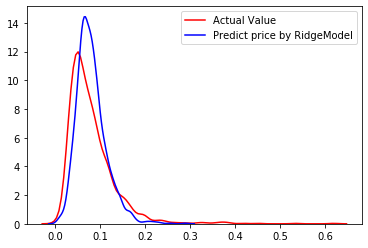

In [28]:
RidgeModel = Ridge(alpha = 0.01)
RidgeModel.fit(x_train,y_train)
yhat_ridge = RidgeModel.predict(x_test)


print('MSE for RidgeModel is: ', mean_squared_error(y_test, yhat_ridge))
print('R score for RidgeModel is: ', RidgeModel.score(x_test, y_test))

### predict by using x_test
ax2 = sns.distplot(y_test, hist= False, color='r', label = "Actual Value")
sns.distplot(yhat_ridge, hist=False, color = "b", label ="Predict price by RidgeModel", ax=ax2)

### For polynomial ridgeModel

MSE for RidgeModel-poly is:  0.001525068475449515
R score for RidgeModel-poly is:  0.4731851005381091


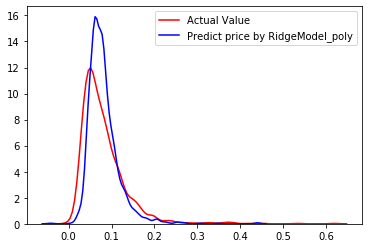

In [29]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel_poly = Ridge(alpha = 0.01)
RidgeModel_poly.fit(x_train_pr, y_train)
yhat_ridge_poly = RidgeModel_poly.predict(x_test_pr)

print('MSE for RidgeModel-poly is: ', mean_squared_error(y_test, yhat_ridge_poly))
print('R score for RidgeModel-poly is: ', RidgeModel_poly.score(x_test_pr, y_test))

### predict by using x_test
ax3 = sns.distplot(y_test, hist= False, color='r', label = "Actual Value")
sns.distplot(yhat_ridge_poly, hist=False, color = "b", label ="Predict price by RidgeModel_poly", ax=ax3)

In [30]:
df1 = df.sample(n = 100) 

### Call Foursquare API, get response from it. 

In [31]:
LIMIT = 50
radius= 500

In [32]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)


In [36]:
results = requests.get(url).json()
results = requests.get(url).json()["response"]['groups'][0]['items']

In [37]:
# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [38]:

nearby_venues = json_normalize(results) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Tian'anmen Tower (天安门城楼),Historic Site,39.906562,116.391582
1,端门,Historic Site,39.908694,116.391192
2,Tian'anmen Square (天安门广场),Plaza,39.904848,116.391306
3,Zhongshan Park (Zhongshan Park 中山公园),Park,39.908765,116.388602
4,中山音乐堂 Forbidden City Concert Hall,Concert Hall,39.909374,116.389439


In [39]:
df1.head()

,Lat,Lng,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway
4814,40.074228,116.330198,0.054673,0.177538,1,1,1,1,3.0,1,6,1.0,1.0,1.0
2932,39.937291,116.322008,0.073832,0.197644,3,1,1,1,4.0,1,2,0.0,0.0,1.0
4679,39.988644,116.476687,0.070093,0.126433,2,1,1,1,4.0,4,2,0.0,1.0,1.0
147,39.971716,116.406986,0.035748,0.097298,1,1,1,1,4.0,1,2,0.0,1.0,1.0
472,39.864254,116.512916,0.095794,0.284138,3,2,1,2,3.0,1,6,1.0,1.0,0.0


In [42]:
def getNearbyVenues(totalPrice, square, l, d,k,bath,buildtype,reno,buildstructure,ele, 
                    five,sub, latitudes, longitudes, radius=500, ):
    
    venues_list=[]
    for price,squ, li, dr, ki, ba, bu, re, bui, el, fi, su, lat, lng in zip(totalPrice, square, l, d,k,bath,buildtype,reno,
                                                                             buildstructure,ele, five,sub,
                                                                            latitudes, longitudes ):
           
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            price,
            squ, li, dr, ki, ba, bu, re, bui, el, fi, su,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [ 
                  'HousePrice',
        'square','livingRoom','drawingRoom',
        'kitchen','bathRoom','buildingType',
        'renovationCondition','buildingStructure','elevator', 'fiveYearsProperty','subway',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [43]:
## 14
LIMIT = 50
Beijing_venues = getNearbyVenues(totalPrice = df1['totalPrice'],square=df1['square'], l=df1['livingRoom'], 
                                 d=df1['drawingRoom'],k=df1['kitchen'],bath=df1['bathRoom'],
                                 buildtype=df1['buildingType'],reno=df1['renovationCondition'],
                                 buildstructure=df1['buildingStructure'],ele=df1['elevator'], five=df1['fiveYearsProperty'],
                                 sub=df1['subway'],
                                 latitudes=df1['Lat'],longitudes=df1['Lng'],)

In [46]:
print(Beijing_venues.shape)
Beijing_venues.head(10)

(607, 18)


,HousePrice,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0.054673,0.177538,1,1,1,1,3.0,1,6,1.0,1.0,1.0,40.074228,116.330198,大鸭梨烤鸭店,40.073061,116.328250,Chinese Restaurant
1,0.054673,0.177538,1,1,1,1,3.0,1,6,1.0,1.0,1.0,40.074228,116.330198,McDonald's (麦当劳),40.078578,116.329954,Fast Food Restaurant
2,0.054673,0.177538,1,1,1,1,3.0,1,6,1.0,1.0,1.0,40.074228,116.330198,McDonald's (麦当劳),40.070313,116.331808,Fast Food Restaurant
3,0.054673,0.177538,1,1,1,1,3.0,1,6,1.0,1.0,1.0,40.074228,116.330198,Costa Coffee (咖世家),40.070201,116.330908,Coffee Shop
4,0.054673,0.177538,1,1,1,1,3.0,1,6,1.0,1.0,1.0,40.074228,116.330198,沃美影城,40.070759,116.332044,Movie Theater
5,0.054673,0.177538,1,1,1,1,3.0,1,6,1.0,1.0,1.0,40.074228,116.330198,上品折扣 Shopin,40.078289,116.329133,Thrift / Vintage Store
6,0.054673,0.177538,1,1,1,1,3.0,1,6,1.0,1.0,1.0,40.074228,116.330198,面包新语 breadtalk,40.070136,116.330584,Bakery
7,0.073832,0.197644,3,1,1,1,4.0,1,2,0.0,0.0,1.0,39.937291,116.322008,唐宫海鲜舫(新世纪店),39.936106,116.320738,Asian Restaurant
8,0.073832,0.197644,3,1,1,1,4.0,1,2,0.0,0.0,1.0,39.937291,116.322008,Starbucks (星巴克),39.936522,116.320590,Coffee Shop
9,0.073832,0.197644,3,1,1,1,4.0,1,2,0.0,0.0,1.0,39.937291,116.322008,KFC (肯德基),39.937687,116.323060,Fast Food Restaurant


#### Wait for: 
#### 1: Add column price and other livingroom, bathroom ...data to the Beijing_venues
#### 2: Using k-mean clustering analysis the data ,
#### 3: Add maker on folium by using Foursquare API

In [57]:
# one hot encoding
beijing_onehot = pd.get_dummies(Beijing_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
beijing_onehot['livingRoom'] = Beijing_venues['livingRoom'] 

# move neighborhood column to the first column
fixed_columns = [beijing_onehot.columns[-1]] + list(beijing_onehot.columns[:-1])
beijing_onehot = beijing_onehot[fixed_columns]

beijing_onehot.head()

,livingRoom,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Garden,Beijing Restaurant,Belgian Restaurant,Bookstore,Bowling Alley,Breakfast Spot,Buffet,Bus Station,Bus Stop,Café,Cantonese Restaurant,Cheese Shop,Chinese Breakfast Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Dongbei Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fishing Spot,Flea Market,Food,Food & Drink Shop,French Restaurant,Furniture / Home Store,Gay Bar,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Historic Site,History Museum,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jiangsu Restaurant,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lounge,Malay Restaurant,Market,Metro Station,Mexican Restaurant,Mobile Phone Shop,Motel,Mountain,Movie Theater,Multiplex,National Park,New American Restaurant,Nightclub,Noodle House,Outdoor Sculpture,Park,Pet Store,Pizza Place,Playground,Plaza,Pool Hall,Ramen Restaurant,Rest Area,Restaurant,River,Russian Restaurant,Sake Bar,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shopping Mall,Snack Place,Spanish Restaurant,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Szechuan Restaurant,Taiwanese Restaurant,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Warehouse Store,Wings Joint,Xinjiang Restaurant,Zhejiang Restaurant
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
Beijing_venues.groupby('Venue Category').count()

,HousePrice,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,,,,,,,,,,,,
American Restaurant,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Antique Shop,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Arcade,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Art Gallery,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Arts & Entertainment,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Asian Restaurant,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Athletics & Sports,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
BBQ Joint,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Bakery,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [60]:
beijing_grouped = beijing_onehot.groupby('livingRoom').mean().reset_index()
beijing_grouped

,livingRoom,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Garden,Beijing Restaurant,Belgian Restaurant,Bookstore,Bowling Alley,Breakfast Spot,Buffet,Bus Station,Bus Stop,Café,Cantonese Restaurant,Cheese Shop,Chinese Breakfast Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Dongbei Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fishing Spot,Flea Market,Food,Food & Drink Shop,French Restaurant,Furniture / Home Store,Gay Bar,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Historic Site,History Museum,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jiangsu Restaurant,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lounge,Malay Restaurant,Market,Metro Station,Mexican Restaurant,Mobile Phone Shop,Motel,Mountain,Movie Theater,Multiplex,National Park,New American Restaurant,Nightclub,Noodle House,Outdoor Sculpture,Park,Pet Store,Pizza Place,Playground,Plaza,Pool Hall,Ramen Restaurant,Rest Area,Restaurant,River,Russian Restaurant,Sake Bar,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shopping Mall,Snack Place,Spanish Restaurant,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Szechuan Restaurant,Taiwanese Restaurant,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Warehouse Store,Wings Joint,Xinjiang Restaurant,Zhejiang Restaurant
0,1,0.000000,0.006849,0.006849,0.000000,0.000000,0.013699,0.000000,0.006849,0.006849,0.006849,0.000000,0.006849,0.020548,0.000000,0.006849,0.000000,0.006849,0.000000,0.006849,0.000000,0.020548,0.006849,0.000000,0.000000,0.143836,0.006849,0.006849,0.054795,0.000000,0.000000,0.000000,0.000000,0.020548,0.000000,0.006849,0.000000,0.000000,0.013699,0.000000,0.000000,0.047945,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.000000,0.000000,0.020548,0.013699,0.013699,0.006849,0.006849,0.013699,0.006849,0.000000,0.089041,0.034247,0.013699,0.006849,0.006849,0.000000,0.000000,0.000000,0.020548,0.000000,0.000000,0.006849,0.013699,0.006849,0.006849,0.000000,0.000000,0.020548,0.000000,0.000000,0.006849,0.006849,0.013699,0.006849,0.006849,0.000000,0.000000,0.006849,0.006849,0.013699,0.000000,0.020548,0.000000,0.000000,0.000000,0.006849,0.000000,0.027397,0.000000,0.000000,0.000000,0.020548,0.000000,0.000000,0.006849,0.006849,0.006849,0.000000,0.000000,0.027397,0.006849,0.000000,0.000000,0.000000,0.000000,0.006849,0.000000,0.000000,0.006849,0.006849,0.013699,0.000000,0.006849,0.006849,0.000000,0.000000,0.000000,0.006849,0.000000
1,2,0.003289,0.000000,0.003289,0.003289,0.003289,0.019737,0.000000,0.023026,0.009868,0.003289,0.000000,0.003289,0.003289,0.003289,0.000000,0.003289,0.000000,0.003289,0.009868,0.003289,0.029605,0.009868,0.003289,0.000000,0.125000,0.003289,0.000000,0.052632,0.003289,0.000000,0.013158,0.000000,0.006579,0.003289,0.000000,0.000000,0.003289,0.009868,0.003289,0.006579,0.062500,0.003289,0.006579,0.003289,0.006579,0.000000,0.000000,0.003289,0.003289,0.013158,0.000000,0.000000,0.000000,0.000000,0.009868,0.003289,0.000000,0.098684,0.000000,0.000000,0.016447,0.000000,0.003289,0.003289,0.009868,0.013158,0.003289,0.000000,0.006579,0.003289,0.000000,0.003289,0.003289,0.006579,0.039474,0.000000,0.003289,0.000000,0.000000,0.009868,0.003289,0.000000,0.009868,0.032895,0.013158,0.000000,0.016447,0.003289,0.026316,0.006579,0.003289,0.003289,0.003289,0.003289,0.006579,0.000000,0.003289,0.003289,0.009868,0.000000,0.003289,0.000000,0.000000,0.003289,0.000000,0.000000,0.023026,0.003289,0.003289,0.000000,0.009868,0.003289,0.016447,0.016447,0.009868,0.000000

In [63]:
### Save these results in a dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [82]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
c_name = ['livingRoom']
for ind in np.arange(num_top_venues):
    try:
        c_name.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        c_name.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=c_name)
neighborhoods_venues_sorted['livingRoom']= beijing_grouped['livingRoom']

for ind in np.arange(beijing_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(beijing_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,livingRoom,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Chinese Restaurant,Hotel,Coffee Shop,Fast Food Restaurant,Hotel Bar,Shopping Mall,Restaurant,Grocery Store,Café,Pizza Place
1,2,Chinese Restaurant,Hotel,Fast Food Restaurant,Coffee Shop,Metro Station,Nightclub,Café,Pizza Place,Shopping Mall,BBQ Joint
2,3,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Hotel,Historic Site,Park,Café,Metro Station,Supermarket,Shopping Mall
3,5,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,French Restaurant,Shopping Mall,Pizza Place,Metro Station,Sporting Goods Shop,Bookstore,Korean Restaurant


In [83]:
### Using K-mean clustering seperate 
# set number of clusters
kclusters = 3

pek_grouped_clustering = beijing_grouped.drop('livingRoom', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(pek_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([0, 0, 2, 1])

In [84]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [87]:
beijing_merged = Beijing_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
beijing_merged = beijing_merged.join(neighborhoods_venues_sorted.set_index('livingRoom'), on='livingRoom')
print(beijing_merged.shape)
beijing_merged # check the last columns!


(607, 29)


,HousePrice,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0.054673,0.177538,1,1,1,1,3.0,1,6,1.0,1.0,1.0,40.074228,116.330198,大鸭梨烤鸭店,40.073061,116.328250,Chinese Restaurant,0,Chinese Restaurant,Hotel,Coffee Shop,Fast Food Restaurant,Hotel Bar,Shopping Mall,Restaurant,Grocery Store,Café,Pizza Place
1,0.054673,0.177538,1,1,1,1,3.0,1,6,1.0,1.0,1.0,40.074228,116.330198,McDonald's (麦当劳),40.078578,116.329954,Fast Food Restaurant,0,Chinese Restaurant,Hotel,Coffee Shop,Fast Food Restaurant,Hotel Bar,Shopping Mall,Restaurant,Grocery Store,Café,Pizza Place
2,0.054673,0.177538,1,1,1,1,3.0,1,6,1.0,1.0,1.0,40.074228,116.330198,McDonald's (麦当劳),40.070313,116.331808,Fast Food Restaurant,0,Chinese Restaurant,Hotel,Coffee Shop,Fast Food Restaurant,Hotel Bar,Shopping Mall,Restaurant,Grocery Store,Café,Pizza Place
3,0.054673,0.177538,1,1,1,1,3.0,1,6,1.0,1.0,1.0,40.074228,116.330198,Costa Coffee (咖世家),40.070201,116.330908,Coffee Shop,0,Chinese Restaurant,Hotel,Coffee Shop,Fast Food Restaurant,Hotel Bar,Shopping Mall,Restaurant,Grocery Store,Café,Pizza Place
4,0.054673,0.177538,1,1,1,1,3.0,1,6,1.0,1.0,1.0,40.074228,116.330198,沃美影城,40.070759,116.332044,Movie Theater,0,Chinese Restaurant,Hotel,Coffee Shop,Fast Food Restaurant,Hotel Bar,Shopping Mall,Restaurant,Grocery Store,Café,Pizza Place
5,0.054673,0.177538,1,1,1,1,3.0,1,6,1.0,1.0,1.0,40.074228,116.330198,上品折扣 Shopin,40.078289,116.329133,Thrift / Vintage Store,0,Chinese Restaurant,Hotel,Coffee Shop,Fast Food Restaurant,Hotel Bar,Shopping Mall,Restaurant,Grocery Store,Café,Pizza Place
6,0.054673,0.177538,1,1,1,1,3.0,1,6,1.0,1.0,1.0,40.074228,116.330198,面包新语 breadtalk,40.070136,116.330584,Bakery,0,Chinese Restaurant,Hotel,Coffee Shop,Fast Food Restaurant,Hotel Bar,Shopping Mall,Restaurant,Grocery Store,Café,Pizza Place
7,0.073832,0.197644,3,1,1,1,4.0,1,2,0.0,0.0,1.0,39.937291,116.322008,唐宫海鲜舫(新世纪店),39.936106,116.320738,Asian Restaurant,2,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Hotel,Historic Site,Park,Café,Metro Station,Supermarket,Shopping Mall
8,0.073832,0.197644,3,1,1,1,4.0,1,2,0.0,0.0,1.0,39.937291,116.322008,Starbucks (星巴克),39.936522,116.320590,Coffee Shop,2,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Hotel,Historic Site,Park,Café,Metro Station,Supermarket,Shopping Mall
9,0.073832,0.197644,3,1,1,1,4.0,1,2,0.0,0.0,1.0,39.937291,116.322008,KFC (肯德基),39.937687,116.323060,Fast Food Restaurant,2,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Hotel,Historic Site,Park,Café,Metro Station,Supermarket,Shopping Mall


In [90]:
sort_cluster = beijing_merged.groupby('Cluster Labels').mean()
sort_cluster

,HousePrice,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude
Cluster Labels,,,,,,,,,,,,,,,,
0,0.075643,0.149345,1.675556,0.977778,1.0,1.013333,3.140000,2.575556,4.480000,0.495556,0.715556,0.653333,39.947007,116.413079,39.947144,116.412938
1,0.094626,0.406182,5.000000,2.000000,1.0,2.000000,4.000000,4.000000,6.000000,0.000000,1.000000,0.000000,40.055271,116.406899,40.057005,116.408029
2,0.107156,0.220451,3.000000,1.285714,1.0,1.314286,3.142857,2.171429,4.342857,0.421429,0.850000,0.785714,39.961926,116.412925,39.962687,116.413074


### Add maker to the folium diagram

In [86]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, price, cluster in zip(beijing_merged['Neighborhood Latitude'], 
                                  beijing_merged['Neighborhood Longitude'], 
                                  beijing_merged['HousePrice'], 
                                  beijing_merged['Cluster Labels']):
    label = folium.Popup(str(price) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
### The cluster means they have same kind of neighborhood nearby that house.
### Cluster 0: usually next to a hotel and chinese resterant, and expecially nightclub
### 
### Cluster 1: next to korean BBQ, shopping mall with 
### 
### Cluster 2: Usully next to cafe shop, no nightclub, but next to shopping mall